In [1]:
import warnings
warnings.filterwarnings("ignore")

# Load data

We need to load both metadata and the real data. We can load the metadata with the following command.

In [2]:
from relgen.data.metadata import Metadata

metadata = Metadata()
metadata.load_from_json("datasets/census/metadata.json")

In [3]:
import pandas as pd

data = {
    "census": pd.read_csv("datasets/census/census.csv")
}

As we can see, the data is loaded.

In [4]:
data['census']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,30,Private,298871,Masters,14,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,1887,45,Iran,>50K
1,40,Private,107306,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
2,49,Federal-gov,157569,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,46,United-States,<=50K
3,52,Federal-gov,53905,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,28,Private,273929,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,1628,60,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,74,Private,211075,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,30,United-States,<=50K
9996,37,Self-emp-not-inc,50096,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,30,United-States,<=50K
9997,41,Private,43501,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
9998,49,Private,178749,Masters,14,Married-spouse-absent,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
from relgen.data.dataset import Dataset

dataset = Dataset(metadata)
dataset.fit(data)

# Train the syntheiszer and generate data

We can init a Syntheiszer with a single line of command, and fit it easily.

In [6]:
from relgen.synthesizer.arsynthesizer import MADESynthesizer

synthesizer = MADESynthesizer(dataset)
synthesizer.fit(data, epochs=10)

table census start training
epoch 0: train loss 45.617, time cost 5.991s
epoch 1: train loss 41.928, time cost 5.999s
epoch 2: train loss 37.930, time cost 6.018s
epoch 3: train loss 33.432, time cost 6.009s
epoch 4: train loss 31.308, time cost 6.003s
epoch 5: train loss 30.328, time cost 5.978s
epoch 6: train loss 29.784, time cost 6.047s
epoch 7: train loss 29.301, time cost 6.004s
epoch 8: train loss 29.083, time cost 5.995s
epoch 9: train loss 28.587, time cost 5.988s
table census training completed, time cost 60.039s


Sample data with sample() function.

In [7]:
sampled_data = synthesizer.sample()

In [8]:
sampled_data['census']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,35,Private,215395,HS-grad,13,Never-married,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0,0,40,United-States,<=50K
1,35,Without-pay,74275,Doctorate,10,Separated,Farming-fishing,Husband,White,Male,0,0,10,United-States,<=50K
2,68,Private,120544,HS-grad,15,Never-married,Protective-serv,Not-in-family,White,Male,0,0,50,United-States,<=50K
3,32,Self-emp-not-inc,342599,Preschool,10,Married-civ-spouse,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
4,53,State-gov,186014,Doctorate,14,Divorced,Craft-repair,Not-in-family,White,Male,0,0,55,Mexico,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9254,20,State-gov,242094,Bachelors,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
9255,39,Local-gov,80485,HS-grad,10,Married-civ-spouse,Exec-managerial,Not-in-family,White,Female,7298,0,45,India,>50K
9256,85,Federal-gov,182142,Preschool,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
9257,39,Federal-gov,183608,Some-college,13,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,60,United-States,<=50K


# Evaluate the generated data

In [12]:
from relgen.evaluator import Evaluator
import warnings
warnings.filterwarnings("ignore")

evaluator = Evaluator(data["census"], sampled_data["census"])

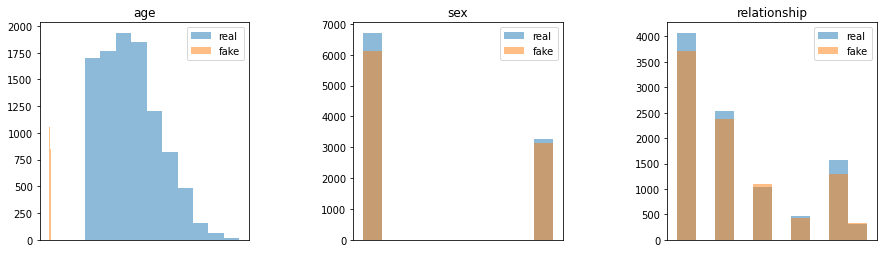

In [13]:
import warnings
warnings.filterwarnings("ignore")
evaluator.eval_histogram(columns=["age", "sex", "relationship"])

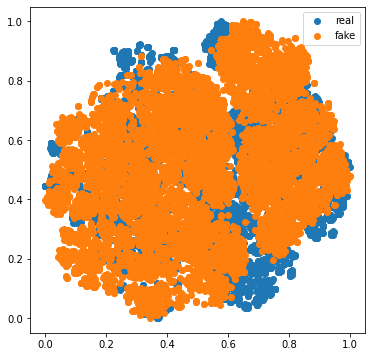

In [11]:
evaluator.eval_tsne()